In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


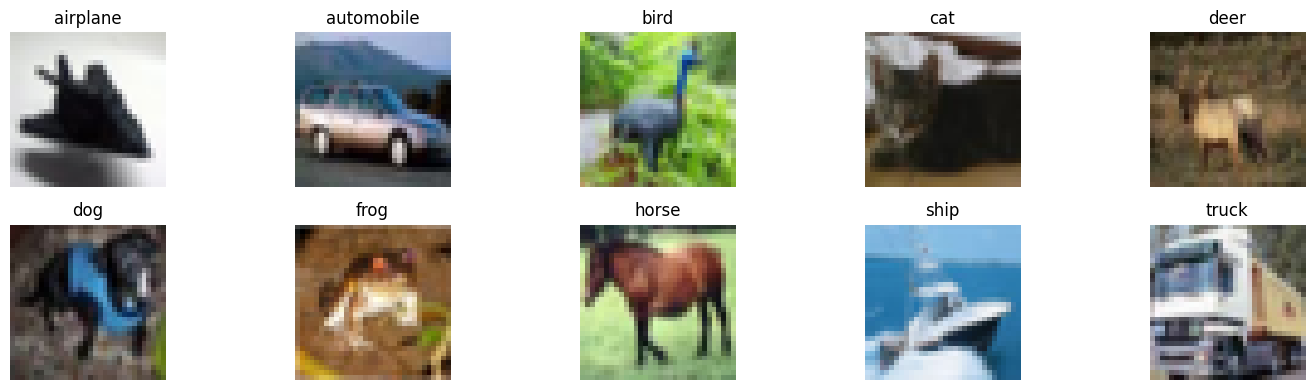

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
unique_classes = np.unique(y_train)
indices = []
for cls in unique_classes:
    idx = np.where(y_train == cls)[0][0]
    indices.append(idx)
plt.figure(figsize=(15, 4))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], interpolation='nearest')
    plt.title(class_names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 17s 11ms/step - loss: 1.6185 - accuracy: 0.4510 - val_loss: 1.2295 - val_accuracy: 0.5602
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.1100 - accuracy: 0.6042 - val_loss: 1.0725 - val_accuracy: 0.6178
Epoch 3/10
782/782 [==============================] - 7s 10ms/step - loss: 0.9465 - accuracy: 0.6659 - val_loss: 0.8559 - val_accuracy: 0.7028
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.8503 - accuracy: 0.7021 - val_loss: 0.8364 - val_accuracy: 0.7093
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7830 - accuracy: 0.7241 - val_loss: 0.7756 - val_accuracy: 0.7321
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.7358 - accuracy: 0.7422 - val_loss: 0.7095 - val_accuracy: 0.7519
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6926 - accuracy: 0.7557 - val_loss: 0.7188 - val_accuracy: 0.7484

In [8]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7957 - accuracy: 0.7329
Test accuracy: 0.7329000234603882
